# Coffee Machine Power Roll Up

Link to the example in the Cookbook:\
[https://mms.openmbee.org/alfresco/mmsapp/mms.html#/projects/PROJECT-ID_2_[...]5/views/_19_0_2_f46036d_1582648674041_192673_2975](https://mms.openmbee.org/alfresco/mmsapp/mms.html#/projects/PROJECT-ID_2_2_17_7_33_25_AM_3ccfaf88_159fe0d7ba9__7d4e_cae_tw_jpl_nasa_gov_127_0_0_1/master/documents/_18_5_2_e64033a_1513278979739_556269_28755/views/_19_0_2_f46036d_1582648674041_192673_2975)

## Structure & Behavior
![img/coffee_structure.svg](img/coffee_structure.svg)
![img/ed247dde-6f79-46f4-9b1d-1e0fae300c9b1584727457366..svg](img/ed247dde-6f79-46f4-9b1d-1e0fae300c9b1584727457366..svg)
![img/5d5a481a-8f40-461e-b9fd-9ea6cc8b3db81584727470124..svg](img/5d5a481a-8f40-461e-b9fd-9ea6cc8b3db81584727470124..svg)
![img/bb4c84ec-fe4d-405f-8621-4e428270d2de1583425517408..svg](img/bb4c84ec-fe4d-405f-8621-4e428270d2de1583425517408..svg)
## Power Analysis
![img/coffee_analysis.svg](img/coffee_analysis.svg)
## Power Analysis Context
![img/coffee_constraint.svg](img/coffee_constraint.svg)

In [13]:
package 'CoffeeMakerDynamicPowerRollUp'{
    import ScalarValues::Real;
    import ScalarFunctions::sum;
    
    import 'PowerRollUpPatternPkg'::*;
    import Behavior::*;
    import Structure::*;
    
    value type Power specializes Real;
    
    package 'PowerRollUpPatternPkg' {
        
        block 'PowerRollUpPattern'{
            part subPower : 'PowerRollUpPattern'[*];
            value power : Power;
            value 'totalPower' : Power = sum(subPower::totalPower) + power;
            
            perform action drawPower : DrawPower (power);
        }

        activity DrawPower (in power_property : Power){
            value power_draw : Power = 0.0;
            
            bind power_property = power_draw;
        }

    }
    
    package Behavior {
        activity 'MakeCoffee'(){
            first start;
            then action grindBeans : GrindBeans;
            then action heatWater : HeatWater;
            then action brewCoffee : BrewCoffee;
            then action keepWarm : KeepWarm;
            then done;
        }

        activity GrindBeans specializes DrawPower {
            value redefines power_draw = 5;
        }
        activity HeatWater specializes DrawPower {
            value redefines power_draw = 10;
        }
        activity BrewCoffee specializes DrawPower {
            value redefines power_draw = 2;
            
            first start;
            then action filterCoffee : FilterCoffee;
            then done;
        }
        activity FilterCoffee specializes DrawPower {
            value redefines power_draw = 1;
        }
        activity KeepWarm specializes DrawPower {
            value redefines power_draw = 1;
        }
    }
    
    package Structure {
        block 'CoffeeMachine' specializes PowerRollUpPattern{
            
            perform action 'makeCoffee' : 'MakeCoffee' redefines drawPower;
            
            part 'coffeeGrinder' : 'CoffeeGrinder' subsets subPower {
                perform 'makeCoffee'::grindBeans redefines drawPower;
            }
            part 'coffeePot' : 'CoffeePot' subsets subPower {
                perform 'makeCoffee'::heatWater redefines drawPower;
            }
            part brewer : 'Brewer' subsets subPower {
                perform 'makeCoffee'::brewCoffee redefines brewCoffee;
            }
            part 'waterHeater' : 'WaterHeater' subsets subPower {
                perform 'makeCoffee'::keepWarm redefines drawPower;
            }            
        }
        
        block 'CoffeeGrinder'  specializes 'PowerRollUpPattern';
        
        block 'CoffeePot' specializes 'PowerRollUpPattern';
        
        block 'Brewer' specializes 'PowerRollUpPattern'{
            perform action brewCoffee : BrewCoffee redefines drawPower;
            
            part filter : 'Filter' subsets subPower {
                perform brewCoffee::filterCoffee redefines drawPower;
            }
        }
        
        block 'WaterHeater' specializes 'PowerRollUpPattern';
        
        block 'Filter' specializes 'PowerRollUpPattern';
    }
    
    package 'PowerAnalysis' {     
        block 'PowerAnalysisContext'{
            value SIMULATION_TIME : Real;
            
            value totalPower : Power = 'coffeeMachine'::totalPower;
            value power_per_time : Power = 'coffeeMachine'::totalPower/SIMULATION_TIME;
            
            part 'coffeeMachine' : 'CoffeeMachine';           
        }
        
        analysis def PowerAnalysis (coffeeMachine : CoffeeMachine) 
            powerPerTime : Power {
                objective{
                    /*
                    Compute power per time
                    */
                }
                
            }
    }
}

Package CoffeeMakerDynamicPowerRollUp (ae485a02-9867-43a4-8085-e84f5f94c2e2)


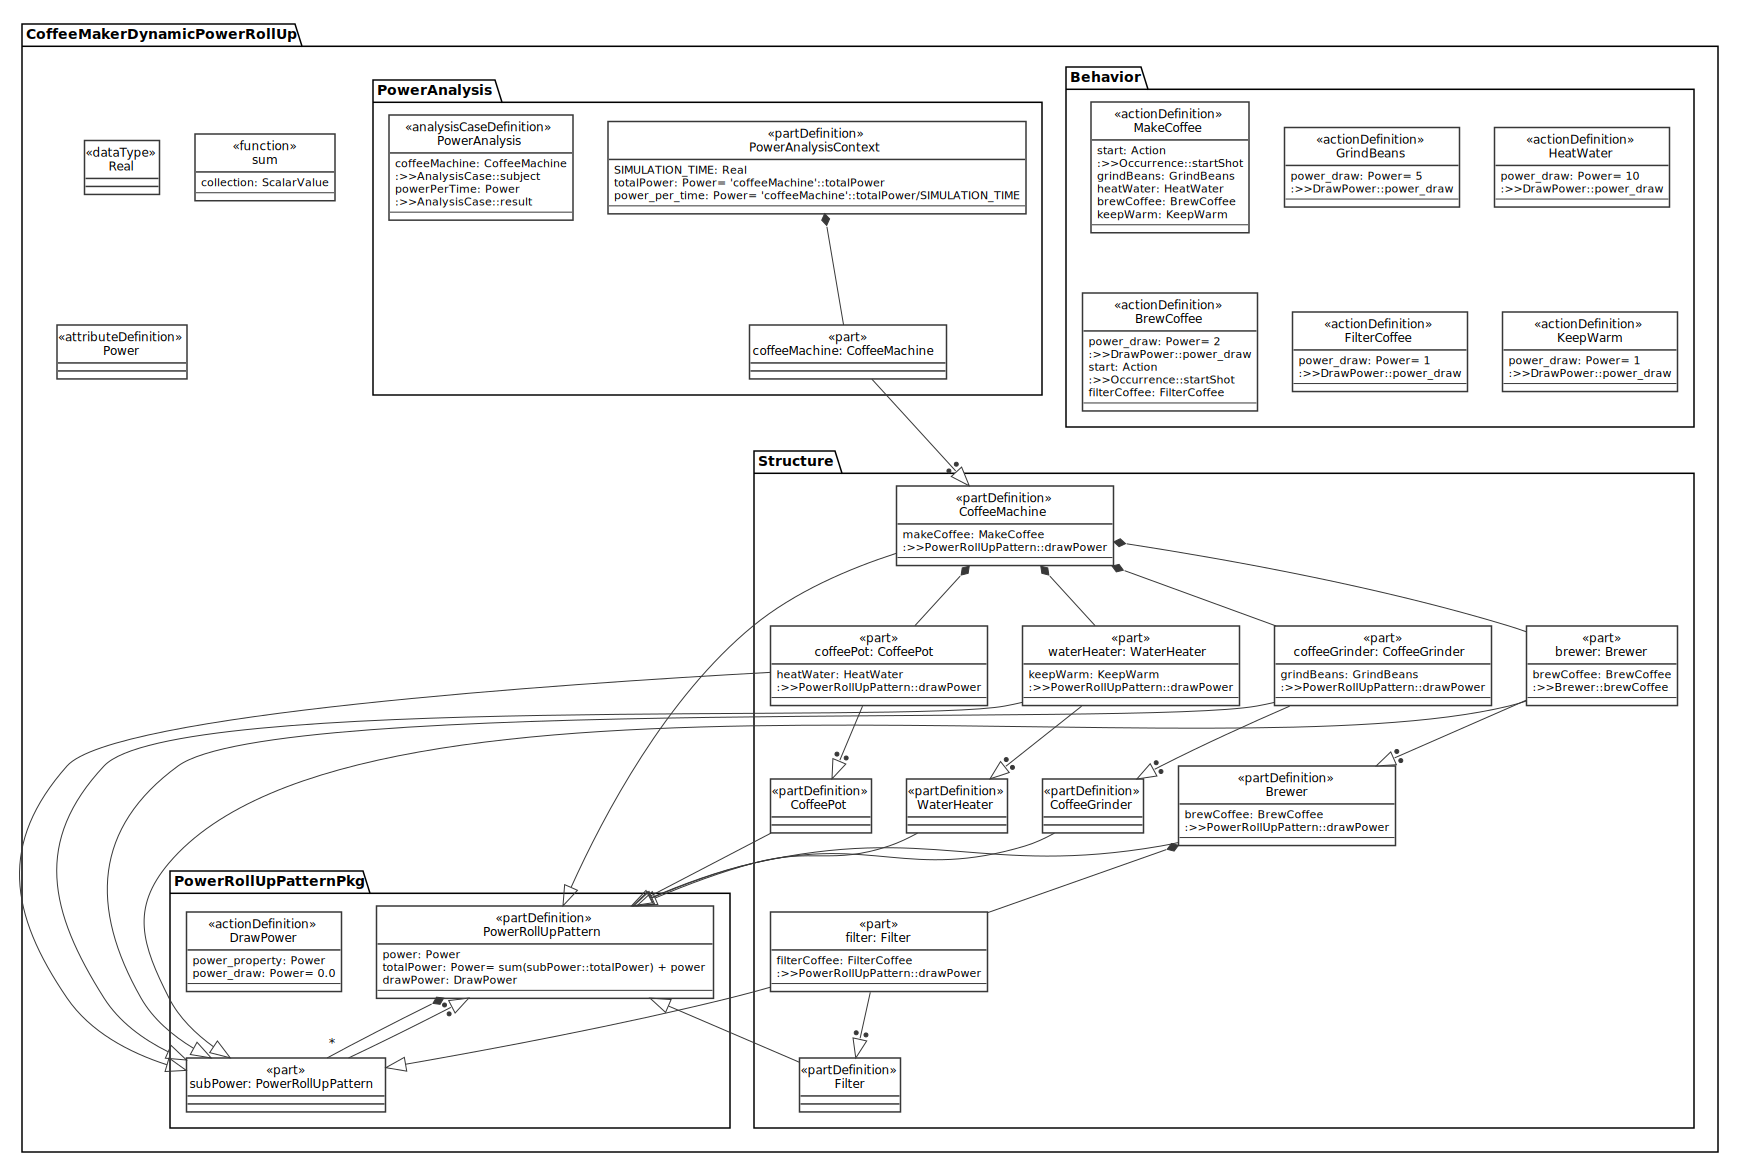

In [14]:
%viz CoffeeMakerDynamicPowerRollUp